
## CAPSTONE PROJECT-4 :- PRCP-1001-RiceLeaf

## PROJECT TEAM ID :- PTID-CDS-AUG-23-1605

Rice plant is susceptible to diseases that may affect the quantity and quality of rice production. Detection of these diseases by the farmers will require a great knowledge about the various disease and how to identify them visually. Monitoring these diseases, their occurrences and frequencies are very important for early detection of the affected plants, their timely treatment, and most importantly, for planning future strategies to prevent the diseases to minimize the losses.
CNN is an algorithm of deep learning techniques that has been successfully invoked for handling computer vision issues such as picture classification, object segmentation, and image analysis. CNN has been used to address the classification of Rice leaf diseases accurate detection and classification of rice leaf disease.

The dataset provided contains 120 jpg images of disease-infected rice leaves. The images are grouped into 3 classes based on the type of disease. There are 40 images in each class.
Classes

* **Bacterial blight**: elongated lesions near the leaf tips and
margins, and turns white to yellow and then grey due to
fungal attack.

* **Brown spot**: 
    dark brown colored and round to oval shaped lesions on rice leaves.
    
* **Leaf smut**: small black linear lesions on leaf blades, leaf
tips may turn grey and dry.


## AIM
**Task 1:**-Prepare a complete data analysis report on the given data.

**Task 2:**-Create a model which can classify the three major attacking diseases of rice plants like leaf blast, bacterial blight and brown spot.

**Task3:**- Analyze various techniques like Data Augmentation, etc and create a report on that.

## IMPORT LIABRARIES

In [7]:
# installing tensorflow
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [8]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import random 
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import os

In [10]:
import tensorflow as  tf
from tensorflow import keras
from keras import layers
from keras.layers import Input, Lambda
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D, MaxPooling2D, BatchNormalization
from keras.models import Model  
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from glob import glob
#import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [11]:
#Give dataset path
train_path = r'D:\DATA SCIENCE\Capstone project\Project reference\Rice Leaf\Data\Data\train'
test_path = r'D:\DATA SCIENCE\Capstone project\Project reference\Rice Leaf\Data\Data\test'

In [12]:
# useful for getting number of classes
train_folders = glob('D:\DATA SCIENCE\Capstone project\Project reference\Rice Leaf\Data\Data\*')
print(len(train_folders))

3


In [13]:
# useful for getting number of classes
test_folders = glob('D:\DATA SCIENCE\Capstone project\Project reference\Rice Leaf\Data\Data\*')
print(len(test_folders))

3


## LOAD DATA

## Visualizing the Image Data

### 1.Bacterial leaf blight 

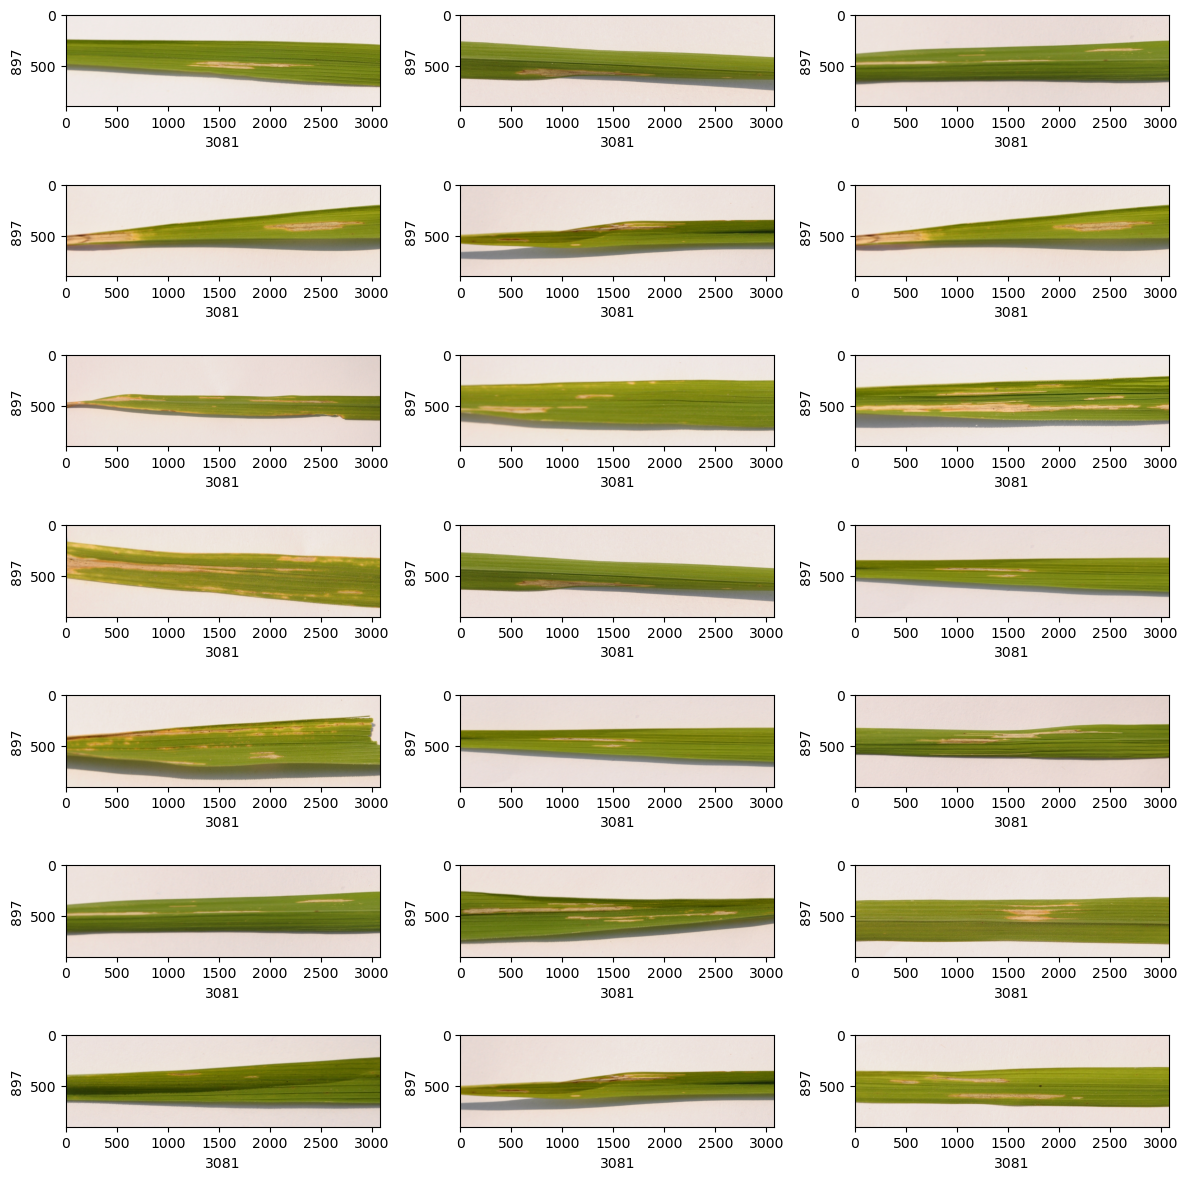

In [14]:
plt.figure(figsize = (12, 12))
bacteria_path = r"D:\DATA SCIENCE\Capstone project\Project reference\Rice Leaf\Data\Data\Bacterial leaf blight"
for i in range(1, 22):
    plt.subplot(7, 3, i)
    plt.tight_layout()
    rand_img = plt.imread(bacteria_path +'/'+ random.choice(sorted(os.listdir(bacteria_path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

### 2.Brown Spot

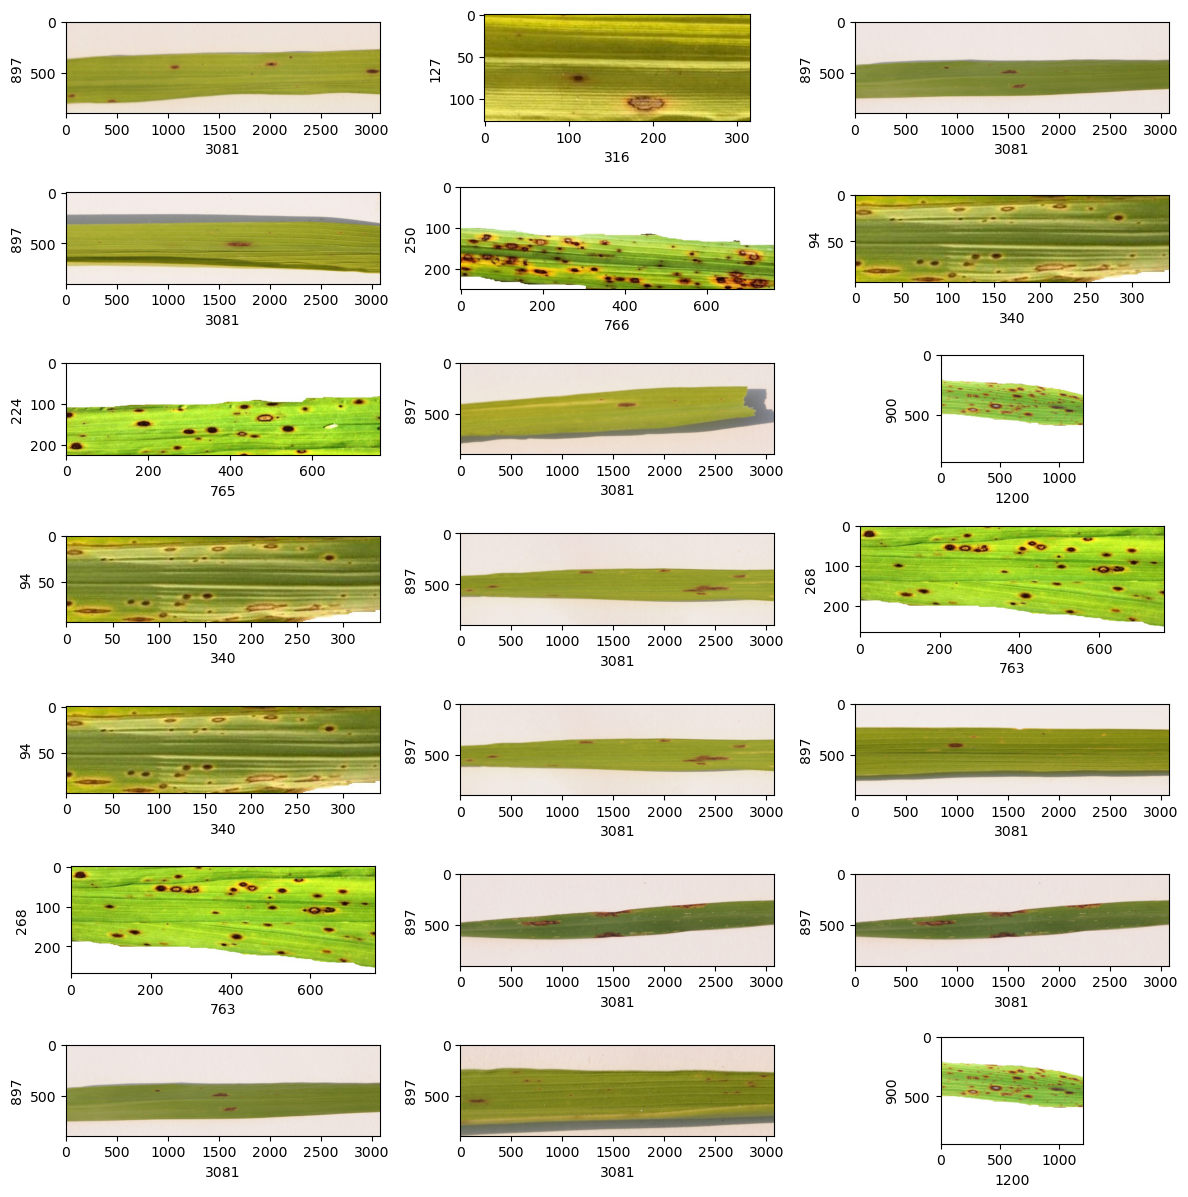

In [15]:
plt.figure(figsize=(12,12))
brown_path =  r"D:\DATA SCIENCE\Capstone project\Project reference\Rice Leaf\Data\Data\Brown spot"
for i in range(1,22):
    plt.subplot(7,3,i)
    plt.tight_layout()
    rand_img = plt.imread(brown_path +'/'+ random.choice(sorted(os.listdir(brown_path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image 

### 3.Leaf Smut

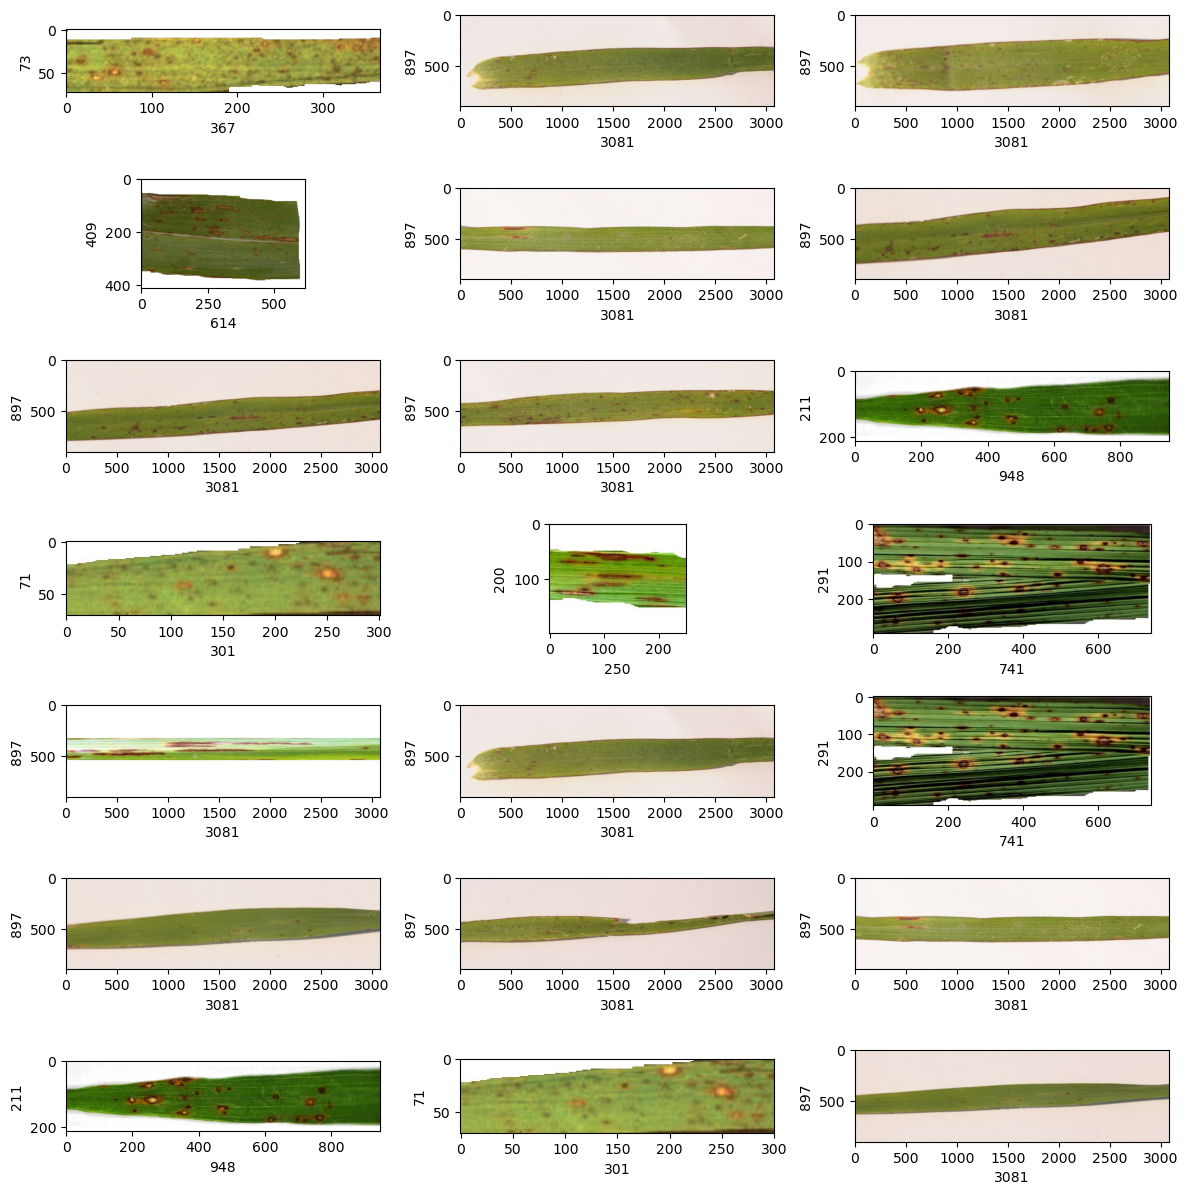

In [16]:
plt.figure(figsize=(12,12))
leaf_smut_path =r"D:\DATA SCIENCE\Capstone project\Project reference\Rice Leaf\Data\Data\Leaf Smut"
for i in range(1,22):
    plt.subplot(7,3,i)
    plt.tight_layout()
    rand_img = plt.imread(leaf_smut_path +'/'+ random.choice(sorted(os.listdir(leaf_smut_path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

## Data Preprocessing

In [17]:
train_datagen = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest',
                                   validation_split = .25)
test_datagen = ImageDataGenerator(rescale=1./255,
                                  validation_split = .25)

### Example of Data Augmentation

In [18]:
from tensorflow.keras.utils import img_to_array, array_to_img, load_img

In [19]:

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img(r"D:\DATA SCIENCE\Capstone project\Project reference\Rice Leaf\Data\Data\Brown spot\DSC_0121.jpg")  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir=r"D:\DATA SCIENCE\Capstone project\Project reference\Rice Leaf\Image Augmentation Example", save_prefix='rice_leaf_brown_spot', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

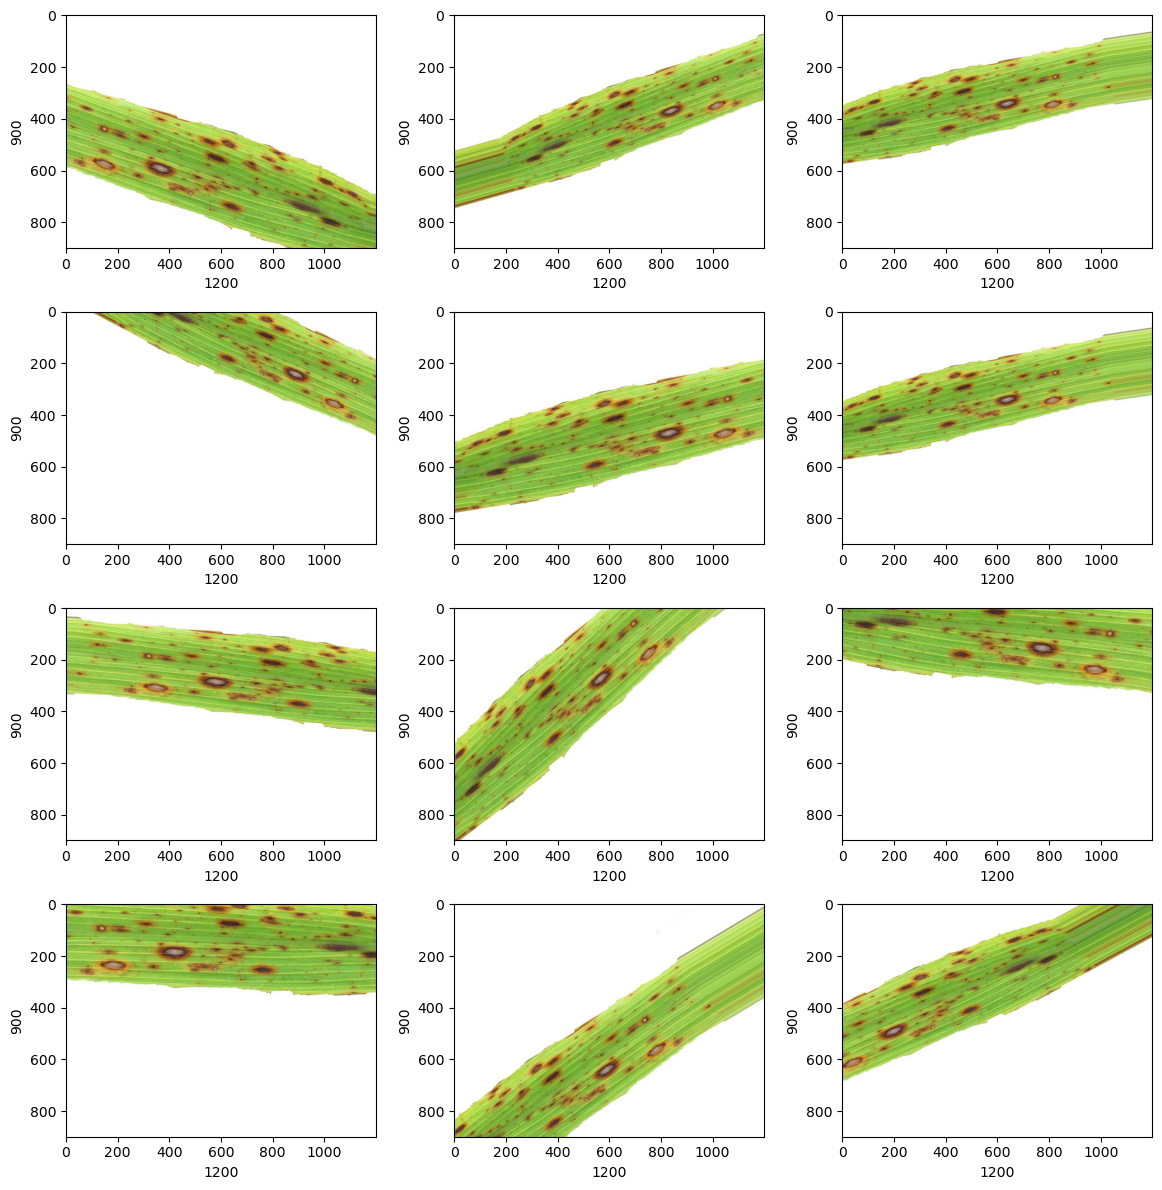

In [20]:
plt.figure(figsize=(12,12))
path = r"D:\DATA SCIENCE\Capstone project\Project reference\Rice Leaf\Image Augmentation Example"
for i in range(1,13):
    plt.subplot(4,3,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

## Generating a Training and Validation set

In [21]:
training_set = train_datagen.flow_from_directory(r"D:\DATA SCIENCE\Capstone project\Project reference\Rice Leaf\Data\Data",
                                       target_size=(256, 256),
                                                 batch_size=5,
                                     class_mode='categorical',
                                            subset='training')



Found 90 images belonging to 3 classes.


In [22]:
validation_set = train_datagen.flow_from_directory(r"D:\DATA SCIENCE\Capstone project\Project reference\Rice Leaf\Data\Data",
                                       target_size=(256, 256),
                                                 batch_size=5,
                                     class_mode='categorical',
                                            subset='validation')

Found 29 images belonging to 3 classes.


## Building the Convolution Neural Network Model

## 1.Using ADAM Optimiser

In [23]:
#Initialising the CNN model
model_adam = Sequential()
# First Convolution Layer
model_adam.add(Conv2D(filters= 16, kernel_size=2, activation='relu', input_shape=[256, 256, 3]))
# First Pooling Layer
model_adam.add(MaxPooling2D(pool_size=2))
# Second Convolution Layer
model_adam.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
# Second Pooling Layer
model_adam.add(MaxPooling2D(pool_size=2))
# Third Convolution Layer
model_adam.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
# Third Pooling Layer
model_adam.add(MaxPooling2D(pool_size=2))
# Fourth Convolution Layer.
model_adam.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
# Fourth Pooling Layer
model_adam.add(MaxPooling2D(pool_size=2))
# Flattening
model_adam.add(Flatten())

# Fully Connected Layer
model_adam.add(Dense(128, activation="relu"))
# Deactivating 50% of neuron
model_adam.add(Dropout(0.5))

# Output Layer
model_adam.add(Dense(3, activation="softmax"))

In [24]:
## Layers
model_adam.layers

In [25]:
## Summary
model_adam.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 255, 255, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      2080      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        4128      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 31, 31, 32)        0

In [26]:
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [27]:
early_stopping

## Compliling the model

In [28]:
from keras.optimizers import Adam

In [29]:

model_adam.compile(loss = 'categorical_crossentropy',  optimizer = 'adam', metrics=['accuracy'])

In [30]:
# Training the model
history_adam = model_adam.fit_generator(training_set,
                    steps_per_epoch=len(training_set),
                    epochs=150,
                    validation_data=validation_set,
                    validation_steps = len(validation_set))
                    

Epoch 1/150
18/18 [==============================] - 7s 311ms/step - loss: 1.1695 - accuracy: 0.3333 - val_loss: 1.1015 - val_accuracy: 0.3448
Epoch 2/150
18/18 [==============================] - 5s 280ms/step - loss: 1.1035 - accuracy: 0.3111 - val_loss: 1.0971 - val_accuracy: 0.3448
Epoch 3/150
18/18 [==============================] - 5s 285ms/step - loss: 1.0944 - accuracy: 0.3111 - val_loss: 1.0954 - val_accuracy: 0.5172
Epoch 4/150
18/18 [==============================] - 5s 286ms/step - loss: 1.0587 - accuracy: 0.4556 - val_loss: 1.0853 - val_accuracy: 0.4828
Epoch 5/150
18/18 [==============================] - 5s 276ms/step - loss: 0.9760 - accuracy: 0.5222 - val_loss: 1.0244 - val_accuracy: 0.5172
Epoch 6/150
18/18 [==============================] - 5s 283ms/step - loss: 1.0336 - accuracy: 0.4444 - val_loss: 1.0986 - val_accuracy: 0.2414
Epoch 7/150
18/18 [==============================] - 5s 278ms/step - loss: 1.0629 - accuracy: 0.4444 - val_loss: 0.9485 - val_accuracy: 0.4138

Epoch 58/150
18/18 [==============================] - 5s 276ms/step - loss: 0.7016 - accuracy: 0.7444 - val_loss: 3.1824 - val_accuracy: 0.7241
Epoch 59/150
18/18 [==============================] - 5s 277ms/step - loss: 0.6913 - accuracy: 0.6778 - val_loss: 3.2108 - val_accuracy: 0.7586
Epoch 60/150
18/18 [==============================] - 5s 292ms/step - loss: 0.5739 - accuracy: 0.7444 - val_loss: 1.6202 - val_accuracy: 0.7931
Epoch 61/150
18/18 [==============================] - 5s 257ms/step - loss: 0.5406 - accuracy: 0.7222 - val_loss: 1.4618 - val_accuracy: 0.7931
Epoch 62/150
18/18 [==============================] - 5s 291ms/step - loss: 0.5513 - accuracy: 0.7111 - val_loss: 2.2173 - val_accuracy: 0.8276
Epoch 63/150
18/18 [==============================] - 5s 301ms/step - loss: 0.5161 - accuracy: 0.7889 - val_loss: 1.4455 - val_accuracy: 0.8276
Epoch 64/150
18/18 [==============================] - 6s 303ms/step - loss: 0.4688 - accuracy: 0.7778 - val_loss: 1.4965 - val_accuracy:

Epoch 115/150
18/18 [==============================] - 5s 283ms/step - loss: 0.1898 - accuracy: 0.9333 - val_loss: 4.1231 - val_accuracy: 0.7931
Epoch 116/150
18/18 [==============================] - 6s 319ms/step - loss: 0.1209 - accuracy: 0.9444 - val_loss: 5.2262 - val_accuracy: 0.6207
Epoch 117/150
18/18 [==============================] - 5s 293ms/step - loss: 0.1160 - accuracy: 0.9556 - val_loss: 4.1893 - val_accuracy: 0.7586
Epoch 118/150
18/18 [==============================] - 5s 284ms/step - loss: 0.0842 - accuracy: 0.9667 - val_loss: 5.0650 - val_accuracy: 0.7586
Epoch 119/150
18/18 [==============================] - 5s 293ms/step - loss: 0.1203 - accuracy: 0.9444 - val_loss: 5.2736 - val_accuracy: 0.6207
Epoch 120/150
18/18 [==============================] - 5s 292ms/step - loss: 0.1497 - accuracy: 0.9111 - val_loss: 3.0174 - val_accuracy: 0.7931
Epoch 121/150
18/18 [==============================] - 5s 291ms/step - loss: 0.3006 - accuracy: 0.8778 - val_loss: 9.1948 - val_ac

In [94]:
score_adam = model_adam.evaluate(validation_set,verbose=0)
accuracy_adam = 100*score_adam[1]
print('Accuracy CNN Model with Adam Optimizer:',accuracy_adam)

Accuracy CNN Model with Adam Optimizer: 89.65517282485962


In [95]:
history_adam.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## Model Loss

Text(0.5, 1.0, 'Model Loss')

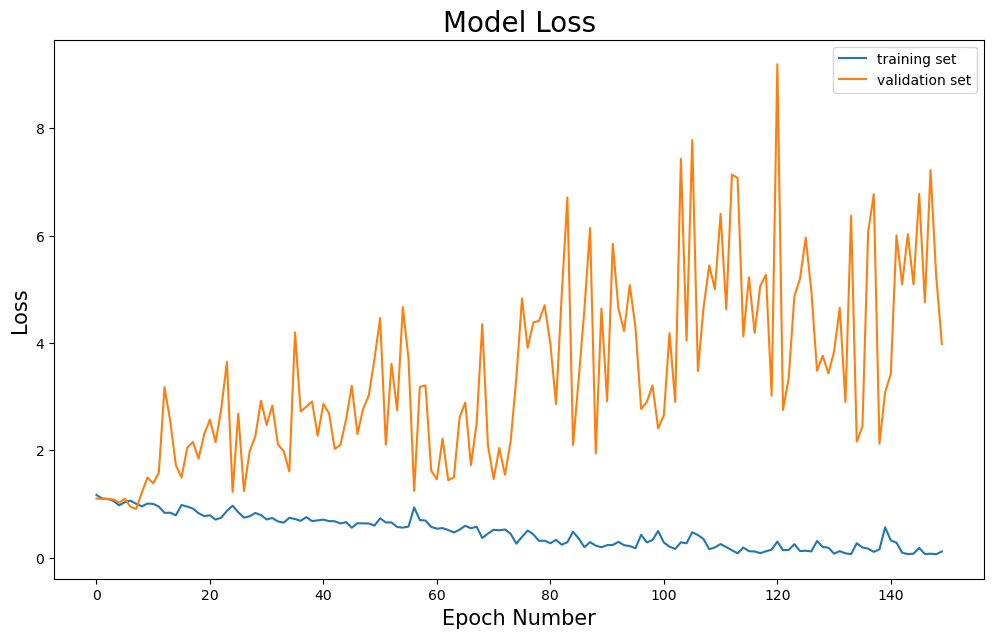

In [96]:
plt.figure(figsize=(12,7))
plt.xlabel('Epoch Number',fontsize=15)
plt.ylabel('Loss',fontsize=15)
plt.plot(history_adam.history['loss'], label = 'training set')
plt.plot(history_adam.history['val_loss'], label = 'validation set')
plt.legend()
plt.title("Model Loss",fontsize=20)

## Model Accuracy

Text(0.5, 1.0, 'Model Accuracy')

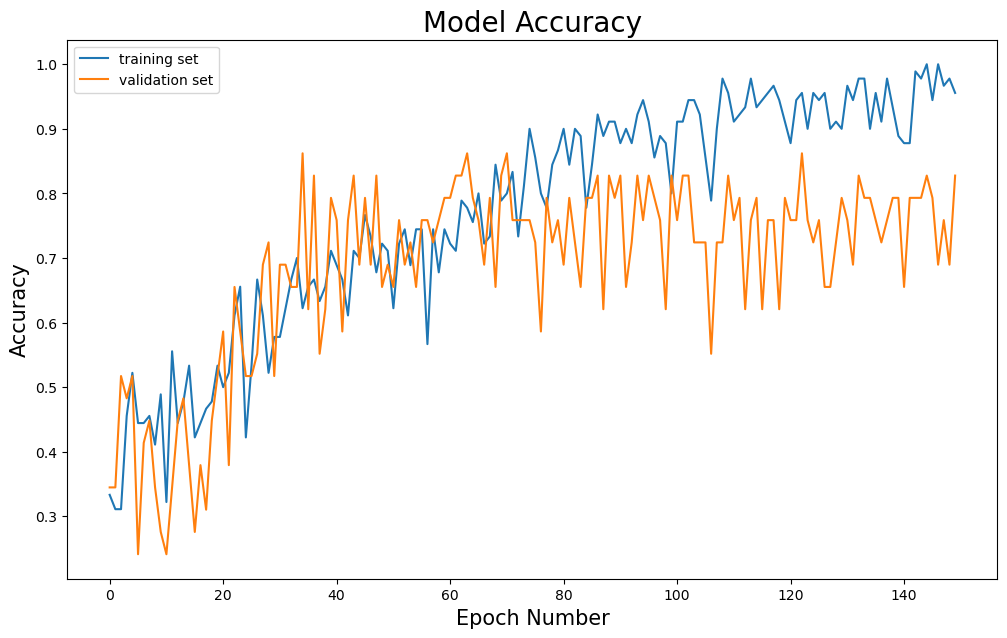

In [141]:
plt.figure(figsize=(12,7))
plt.xlabel('Epoch Number',fontsize=15)
plt.ylabel('Accuracy',fontsize=15)
plt.plot(history_adam.history['accuracy'], label = 'training set')
plt.plot(history_adam.history['val_accuracy'], label = 'validation set')
plt.legend()
plt.title("Model Accuracy",fontsize=20)


## 2.Using RMSProp Optimizer

In [35]:
#Initialising the CNN model
model_rms = Sequential()
# First Convolution Layer
model_rms.add(Conv2D(filters= 16, kernel_size=2, activation='relu', input_shape=[256, 256, 3]))
# First Pooling Layer
model_rms.add(MaxPooling2D(pool_size=2))
# Second Convolution Layer
model_rms.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
# Second Pooling Layer
model_rms.add(MaxPooling2D(pool_size=2))
# Third Convolution Layer
model_rms.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
# Third Pooling Layer
model_rms.add(MaxPooling2D(pool_size=2))
# Fourth Convolution Layer.
model_rms.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
# Fourth Pooling Layer
model_rms.add(MaxPooling2D(pool_size=2))
# Flattening
model_rms.add(Flatten())
# Fully Connected Layer
model_rms.add(Dense(128, activation="relu"))
# Deactivating 50% of neuron
model_rms.add(Dropout(0.5))

# Output Layer
model_rms.add(Dense(3, activation="softmax"))

In [36]:
## Layers
model_rms.layers

In [37]:
model_rms.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 255, 255, 16)      208       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 126, 126, 32)      2080      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 62, 62, 32)        4128      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 31, 31, 32)       

## Compilinig the Model

In [38]:
from keras.optimizers import RMSprop
model_rms.compile(loss = 'categorical_crossentropy',  optimizer = 'RMSprop', metrics=['accuracy'])

In [39]:
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [40]:
early_stopping

In [41]:
# Training the model
history_rms = model_rms.fit_generator(training_set,steps_per_epoch=len(training_set),epochs=150,validation_data=validation_set,validation_steps = len(validation_set))
                                         
                                          

Epoch 1/150
18/18 [==============================] - 6s 307ms/step - loss: 1.1189 - accuracy: 0.4000 - val_loss: 1.1678 - val_accuracy: 0.3448
Epoch 2/150
18/18 [==============================] - 5s 293ms/step - loss: 1.0986 - accuracy: 0.4111 - val_loss: 1.0222 - val_accuracy: 0.6207
Epoch 3/150
18/18 [==============================] - 5s 292ms/step - loss: 1.0703 - accuracy: 0.4111 - val_loss: 1.0704 - val_accuracy: 0.4138
Epoch 4/150
18/18 [==============================] - 5s 285ms/step - loss: 1.1042 - accuracy: 0.4556 - val_loss: 0.9406 - val_accuracy: 0.7931
Epoch 5/150
18/18 [==============================] - 5s 283ms/step - loss: 1.0539 - accuracy: 0.5333 - val_loss: 0.9533 - val_accuracy: 0.6207
Epoch 6/150
18/18 [==============================] - 5s 279ms/step - loss: 0.9434 - accuracy: 0.5444 - val_loss: 1.2987 - val_accuracy: 0.3103
Epoch 7/150
18/18 [==============================] - 5s 286ms/step - loss: 0.9767 - accuracy: 0.5667 - val_loss: 0.8066 - val_accuracy: 0.6897

Epoch 58/150
18/18 [==============================] - 5s 289ms/step - loss: 0.4857 - accuracy: 0.8444 - val_loss: 1.6084 - val_accuracy: 0.4483
Epoch 59/150
18/18 [==============================] - 5s 287ms/step - loss: 0.3279 - accuracy: 0.8889 - val_loss: 1.3245 - val_accuracy: 0.8276
Epoch 60/150
18/18 [==============================] - 5s 296ms/step - loss: 0.2639 - accuracy: 0.9111 - val_loss: 0.7549 - val_accuracy: 0.6897
Epoch 61/150
18/18 [==============================] - 5s 297ms/step - loss: 0.3834 - accuracy: 0.8556 - val_loss: 2.6147 - val_accuracy: 0.4138
Epoch 62/150
18/18 [==============================] - 5s 290ms/step - loss: 0.3490 - accuracy: 0.8444 - val_loss: 0.6211 - val_accuracy: 0.7241
Epoch 63/150
18/18 [==============================] - 5s 289ms/step - loss: 0.2680 - accuracy: 0.8556 - val_loss: 1.9517 - val_accuracy: 0.8276
Epoch 64/150
18/18 [==============================] - 5s 277ms/step - loss: 0.2480 - accuracy: 0.8889 - val_loss: 1.0315 - val_accuracy:

Epoch 115/150
18/18 [==============================] - 5s 259ms/step - loss: 0.2269 - accuracy: 0.9333 - val_loss: 4.8495 - val_accuracy: 0.7586
Epoch 116/150
18/18 [==============================] - 5s 289ms/step - loss: 0.1148 - accuracy: 0.9556 - val_loss: 1.5847 - val_accuracy: 0.8276
Epoch 117/150
18/18 [==============================] - 5s 292ms/step - loss: 0.2290 - accuracy: 0.9333 - val_loss: 1.3825 - val_accuracy: 0.8966
Epoch 118/150
18/18 [==============================] - 5s 258ms/step - loss: 0.0583 - accuracy: 0.9778 - val_loss: 4.2797 - val_accuracy: 0.6897
Epoch 119/150
18/18 [==============================] - 5s 258ms/step - loss: 0.2941 - accuracy: 0.9556 - val_loss: 1.9676 - val_accuracy: 0.7586
Epoch 120/150
18/18 [==============================] - 5s 273ms/step - loss: 0.7110 - accuracy: 0.8778 - val_loss: 3.4075 - val_accuracy: 0.6552
Epoch 121/150
18/18 [==============================] - 5s 261ms/step - loss: 0.1476 - accuracy: 0.9667 - val_loss: 5.0845 - val_ac

In [118]:
score_rms = model_rms.evaluate(validation_set,verbose=0)
accuracy_rms = 100*score_rms[1]
print('Accuracy CNN Model with RMSprop Optimizer:',accuracy_rms)

Accuracy CNN Model with RMSprop Optimizer: 82.75862336158752


In [119]:
history_rms.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## Model Loss

Text(0.5, 1.0, 'Model Loss')

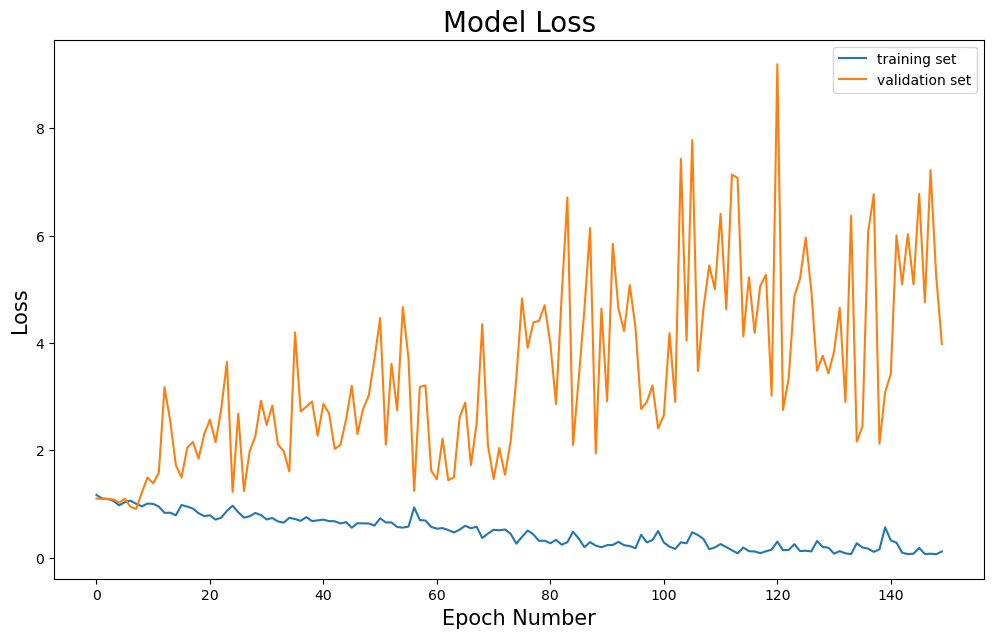

In [120]:
plt.figure(figsize=(12,7))
plt.xlabel('Epoch Number',fontsize=15)
plt.ylabel('Loss',fontsize=15)
plt.plot(history_adam.history['loss'], label = 'training set')
plt.plot(history_adam.history['val_loss'], label = 'validation set')
plt.legend()
plt.title("Model Loss",fontsize=20)

## Model Accuracy

Text(0.5, 1.0, 'Model Accuracy')

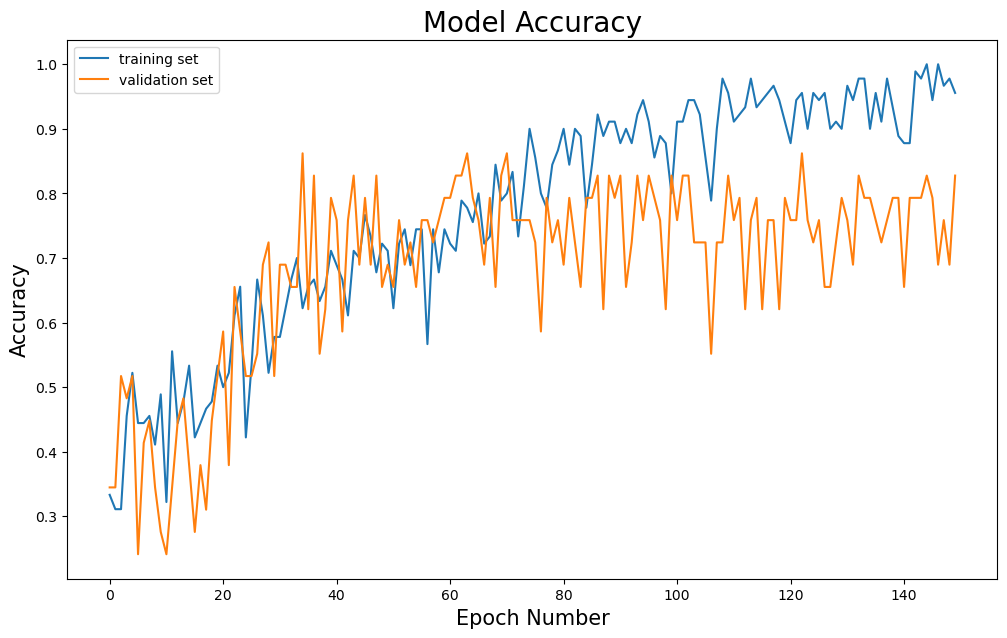

In [121]:
plt.figure(figsize=(12,7))
plt.xlabel('Epoch Number',fontsize=15)
plt.ylabel('Accuracy',fontsize=15)
plt.plot(history_adam.history['accuracy'], label = 'training set')
plt.plot(history_adam.history['val_accuracy'], label = 'validation set')
plt.legend()
plt.title("Model Accuracy",fontsize=20)


## 3.Using  SGD as Optimizer

In [47]:
#Initialising the CNN model
model_sgd = Sequential()
# First Convolution Layer
model_sgd.add(Conv2D(filters= 16, kernel_size=2, activation='relu', input_shape=[256, 256, 3]))
# First Pooling Layer
model_sgd.add(MaxPooling2D(pool_size=2))
# Second Convolution Layer
model_sgd.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
# Second Pooling Layer
model_sgd.add(MaxPooling2D(pool_size=2))
# Third Convolution Layer
model_sgd.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
# Third Pooling Layer
model_sgd.add(MaxPooling2D(pool_size=2))
# Fourth Convolution Layer.
model_sgd.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
# Fourth Pooling Layer
model_sgd.add(MaxPooling2D(pool_size=2))
# Flattening
model_sgd.add(Flatten())
# Fully Connected Layer
model_sgd.add(Dense(128, activation="relu"))

# Output Layer
model_sgd.add(Dense(3, activation="softmax"))

In [48]:
model_sgd.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 255, 255, 16)      208       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 126, 126, 32)      2080      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 62, 62, 32)        4128      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 31, 31, 32)       

## compiling the Model with SGD Optimizer

In [49]:
from keras.optimizers import SGD
model_sgd.compile(loss = 'categorical_crossentropy',  optimizer = "sgd", metrics=['accuracy'])

In [50]:
# Training the model
history_sgd = model_sgd.fit_generator(training_set,
                    steps_per_epoch=len(training_set),
                    epochs=150,
                    validation_data=validation_set,
                    validation_steps = len(validation_set))
                    

Epoch 1/150
18/18 [==============================] - 6s 309ms/step - loss: 1.1115 - accuracy: 0.3444 - val_loss: 1.0989 - val_accuracy: 0.3448
Epoch 2/150
18/18 [==============================] - 5s 266ms/step - loss: 1.1071 - accuracy: 0.3444 - val_loss: 1.0936 - val_accuracy: 0.3448
Epoch 3/150
18/18 [==============================] - 5s 266ms/step - loss: 1.1061 - accuracy: 0.2889 - val_loss: 1.0918 - val_accuracy: 0.4828
Epoch 4/150
18/18 [==============================] - 5s 259ms/step - loss: 1.1006 - accuracy: 0.3222 - val_loss: 1.0849 - val_accuracy: 0.5862
Epoch 5/150
18/18 [==============================] - 5s 282ms/step - loss: 1.0965 - accuracy: 0.3889 - val_loss: 1.0846 - val_accuracy: 0.4483
Epoch 6/150
18/18 [==============================] - 5s 260ms/step - loss: 1.1025 - accuracy: 0.3111 - val_loss: 1.0779 - val_accuracy: 0.4138
Epoch 7/150
18/18 [==============================] - 5s 258ms/step - loss: 1.0999 - accuracy: 0.3333 - val_loss: 1.0727 - val_accuracy: 0.6552

Epoch 58/150
18/18 [==============================] - 5s 280ms/step - loss: 0.8205 - accuracy: 0.6111 - val_loss: 0.6331 - val_accuracy: 0.8966
Epoch 59/150
18/18 [==============================] - 5s 289ms/step - loss: 0.8417 - accuracy: 0.5444 - val_loss: 0.8164 - val_accuracy: 0.6552
Epoch 60/150
18/18 [==============================] - 5s 278ms/step - loss: 0.7987 - accuracy: 0.6333 - val_loss: 0.8192 - val_accuracy: 0.6897
Epoch 61/150
18/18 [==============================] - 5s 274ms/step - loss: 0.9110 - accuracy: 0.6111 - val_loss: 0.7999 - val_accuracy: 0.6552
Epoch 62/150
18/18 [==============================] - 5s 260ms/step - loss: 0.8148 - accuracy: 0.5778 - val_loss: 1.3988 - val_accuracy: 0.3103
Epoch 63/150
18/18 [==============================] - 5s 258ms/step - loss: 0.9148 - accuracy: 0.5222 - val_loss: 1.2122 - val_accuracy: 0.3448
Epoch 64/150
18/18 [==============================] - 5s 275ms/step - loss: 0.9070 - accuracy: 0.5000 - val_loss: 0.7308 - val_accuracy:

Epoch 115/150
18/18 [==============================] - 5s 260ms/step - loss: 0.5853 - accuracy: 0.7444 - val_loss: 0.6776 - val_accuracy: 0.7241
Epoch 116/150
18/18 [==============================] - 5s 281ms/step - loss: 0.6812 - accuracy: 0.7889 - val_loss: 0.5157 - val_accuracy: 0.6897
Epoch 117/150
18/18 [==============================] - 5s 277ms/step - loss: 0.5621 - accuracy: 0.7889 - val_loss: 0.5843 - val_accuracy: 0.6897
Epoch 118/150
18/18 [==============================] - 5s 284ms/step - loss: 0.5936 - accuracy: 0.7222 - val_loss: 0.4278 - val_accuracy: 0.8621
Epoch 119/150
18/18 [==============================] - 5s 284ms/step - loss: 0.5130 - accuracy: 0.7778 - val_loss: 0.9775 - val_accuracy: 0.6552
Epoch 120/150
18/18 [==============================] - 5s 285ms/step - loss: 0.5759 - accuracy: 0.7111 - val_loss: 0.5304 - val_accuracy: 0.8966
Epoch 121/150
18/18 [==============================] - 5s 284ms/step - loss: 0.5252 - accuracy: 0.7444 - val_loss: 0.4931 - val_ac

In [124]:
score_sgd = model_sgd.evaluate(validation_set,verbose=0)
accuracy_sgd = 100*score_sgd[1]
print('Accuracy CNN Model with SGD Optimizer',accuracy_sgd)

Accuracy CNN Model with SGD Optimizer 86.20689511299133


In [125]:
history_sgd.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## Model Loss

Text(0.5, 1.0, 'Model Loss')

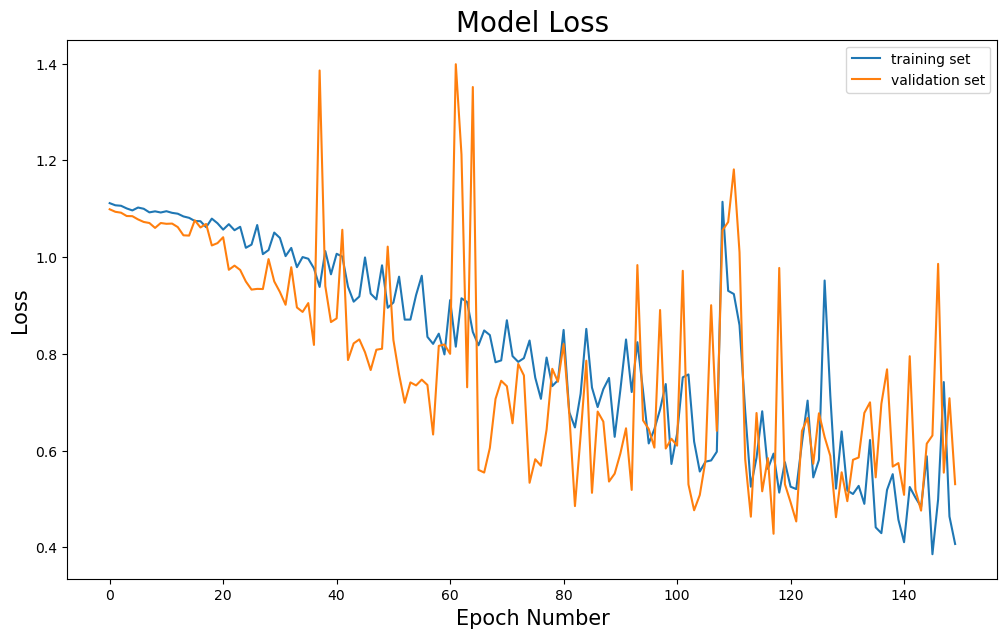

In [126]:
plt.figure(figsize=(12,7))
plt.xlabel('Epoch Number',fontsize=15)
plt.ylabel('Loss',fontsize=15)
plt.plot(history_sgd.history['loss'], label = 'training set')
plt.plot(history_sgd.history['val_loss'], label = 'validation set')
plt.legend()
plt.title("Model Loss",fontsize=20)

## Model Accuracy

Text(0.5, 1.0, 'Model Accuracy')

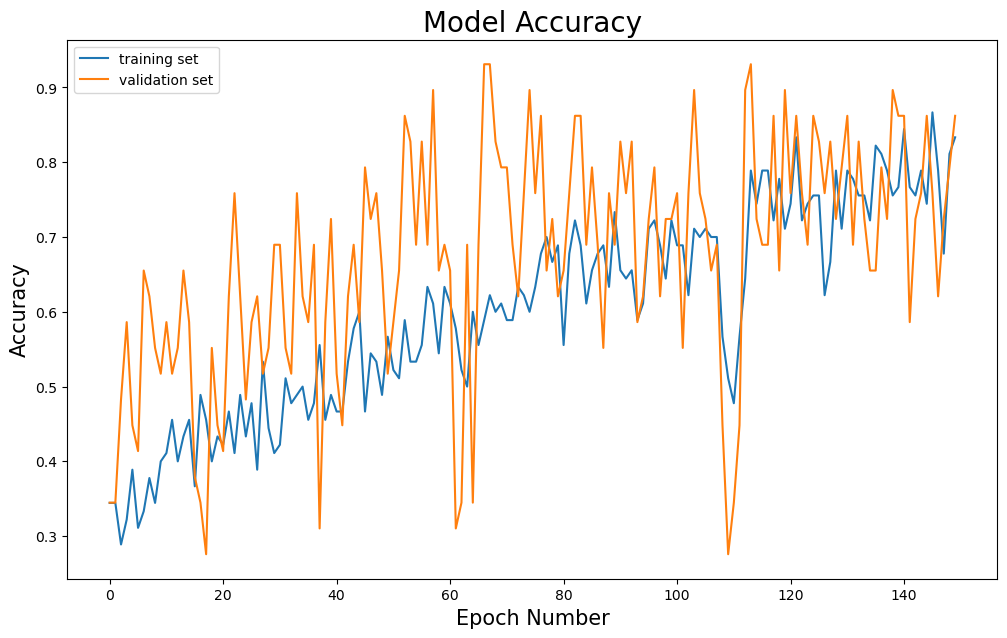

In [127]:
plt.figure(figsize=(12,7))
plt.xlabel('Epoch Number',fontsize=15)
plt.ylabel('Accuracy',fontsize=15)
plt.plot(history_sgd.history['accuracy'], label = 'training set')
plt.plot(history_sgd.history['val_accuracy'], label = 'validation set')
plt.legend()
plt.title("Model Accuracy",fontsize=20)


## 4.Using Adagrad as Optimizer

In [55]:
#Initialising the CNN model
model_adagrad = Sequential()
# First Convolution Layer
model_adagrad.add(Conv2D(filters= 16, kernel_size=2, activation='relu', input_shape=[256, 256, 3]))
# First Pooling Layer
model_adagrad.add(MaxPooling2D(pool_size=2))
# Second Convolution Layer
model_adagrad.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
# Second Pooling Layer
model_adagrad.add(MaxPooling2D(pool_size=2))
# Third Convolution Layer
model_adagrad.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
# Third Pooling Layer
model_adagrad.add(MaxPooling2D(pool_size=2))
# Fourth Convolution Layer.
model_adagrad.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
# Fourth Pooling Layer
model_adagrad.add(MaxPooling2D(pool_size=2))
# Flattening
model_adagrad.add(Flatten())

# Fully Connected Layer
model_adagrad.add(Dense(128, activation="relu"))
# Deactivating 50% of neuron
model_adagrad.add(Dropout(0.5))

# Output Layer
model_adagrad.add(Dense(3, activation="softmax"))

In [56]:
model_adagrad.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 255, 255, 16)      208       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 127, 127, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 126, 126, 32)      2080      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 62, 62, 32)        4128      
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 31, 31, 32)       

## Compiling the model

In [57]:
from keras.optimizers import Adagrad
model_adagrad.compile(loss = 'categorical_crossentropy',  optimizer = 'Adagrad', metrics=['accuracy'])

In [58]:
# Training the model
history_adagrad = model_adagrad.fit_generator(training_set,
                    steps_per_epoch=len(training_set),
                    epochs=150,
                    validation_data=validation_set,
                    validation_steps = len(validation_set))
                    

Epoch 1/150
18/18 [==============================] - 6s 277ms/step - loss: 1.1415 - accuracy: 0.3333 - val_loss: 1.1047 - val_accuracy: 0.4138
Epoch 2/150
18/18 [==============================] - 6s 355ms/step - loss: 1.1494 - accuracy: 0.2222 - val_loss: 1.1102 - val_accuracy: 0.3103
Epoch 3/150
18/18 [==============================] - 6s 344ms/step - loss: 1.1191 - accuracy: 0.2667 - val_loss: 1.1045 - val_accuracy: 0.3793
Epoch 4/150
18/18 [==============================] - 7s 407ms/step - loss: 1.1204 - accuracy: 0.3111 - val_loss: 1.0991 - val_accuracy: 0.3793
Epoch 5/150
18/18 [==============================] - 5s 271ms/step - loss: 1.1069 - accuracy: 0.3333 - val_loss: 1.1125 - val_accuracy: 0.3448
Epoch 6/150
18/18 [==============================] - 5s 255ms/step - loss: 1.1250 - accuracy: 0.2889 - val_loss: 1.0977 - val_accuracy: 0.3448
Epoch 7/150
18/18 [==============================] - 5s 267ms/step - loss: 1.1196 - accuracy: 0.2444 - val_loss: 1.0967 - val_accuracy: 0.3793

Epoch 58/150
18/18 [==============================] - 5s 256ms/step - loss: 1.0962 - accuracy: 0.4333 - val_loss: 1.1176 - val_accuracy: 0.1034
Epoch 59/150
18/18 [==============================] - 5s 250ms/step - loss: 1.1025 - accuracy: 0.3111 - val_loss: 1.0987 - val_accuracy: 0.3793
Epoch 60/150
18/18 [==============================] - 5s 257ms/step - loss: 1.0950 - accuracy: 0.3778 - val_loss: 1.1043 - val_accuracy: 0.3448
Epoch 61/150
18/18 [==============================] - 4s 250ms/step - loss: 1.0913 - accuracy: 0.3444 - val_loss: 1.1068 - val_accuracy: 0.3448
Epoch 62/150
18/18 [==============================] - 5s 251ms/step - loss: 1.0891 - accuracy: 0.4222 - val_loss: 1.0989 - val_accuracy: 0.3448
Epoch 63/150
18/18 [==============================] - 5s 267ms/step - loss: 1.0871 - accuracy: 0.3778 - val_loss: 1.1052 - val_accuracy: 0.3103
Epoch 64/150
18/18 [==============================] - 5s 305ms/step - loss: 1.0860 - accuracy: 0.3778 - val_loss: 1.0997 - val_accuracy:

Epoch 115/150
18/18 [==============================] - 5s 287ms/step - loss: 1.0832 - accuracy: 0.4222 - val_loss: 1.1108 - val_accuracy: 0.3103
Epoch 116/150
18/18 [==============================] - 5s 273ms/step - loss: 1.0838 - accuracy: 0.4111 - val_loss: 1.0858 - val_accuracy: 0.4138
Epoch 117/150
18/18 [==============================] - 5s 295ms/step - loss: 1.0732 - accuracy: 0.4000 - val_loss: 1.1000 - val_accuracy: 0.3103
Epoch 118/150
18/18 [==============================] - 6s 321ms/step - loss: 1.0597 - accuracy: 0.4778 - val_loss: 1.0836 - val_accuracy: 0.4138
Epoch 119/150
18/18 [==============================] - 7s 373ms/step - loss: 1.0847 - accuracy: 0.4111 - val_loss: 1.0935 - val_accuracy: 0.3793
Epoch 120/150
18/18 [==============================] - 7s 395ms/step - loss: 1.0938 - accuracy: 0.3333 - val_loss: 1.1147 - val_accuracy: 0.3448
Epoch 121/150
18/18 [==============================] - 6s 328ms/step - loss: 1.0832 - accuracy: 0.4667 - val_loss: 1.1109 - val_ac

In [135]:
score_adagrad = model_adagrad.evaluate(validation_set,verbose=0)
accuracy_adagrad = 100*score_adagrad[1]
print('Accuracy CNN Model with Adagrad Optimizer',accuracy_adagrad)

Accuracy CNN Model with Adagrad Optimizer 41.37931168079376


In [136]:
history_adagrad.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## Model Loss

Text(0.5, 1.0, 'Model Loss')

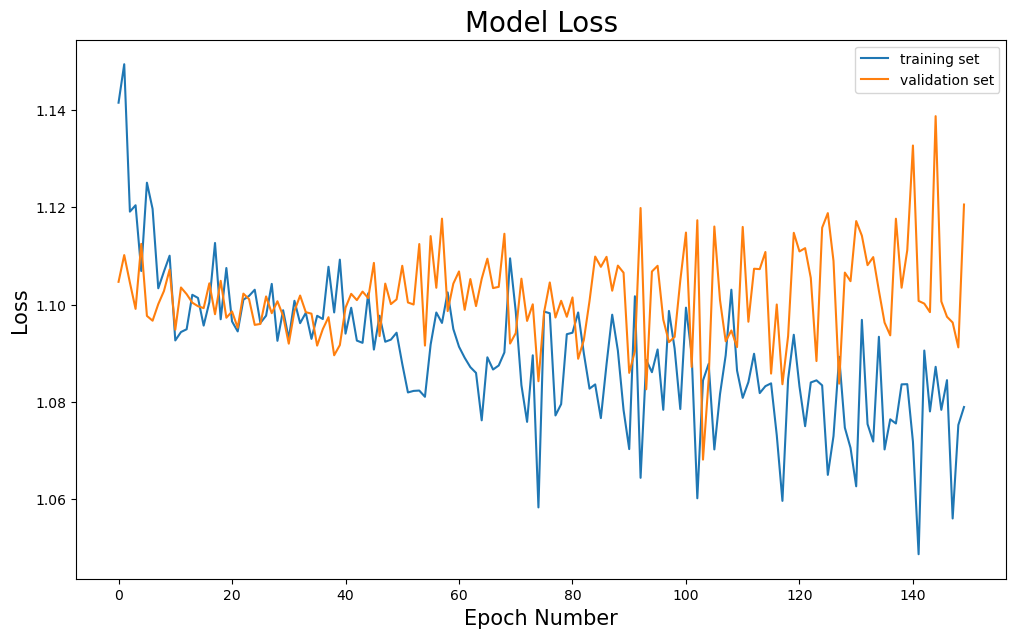

In [137]:
plt.figure(figsize=(12,7))
plt.xlabel('Epoch Number',fontsize=15)
plt.ylabel('Loss',fontsize=15)
plt.plot(history_adagrad.history['loss'], label = 'training set')
plt.plot(history_adagrad.history['val_loss'], label = 'validation set')
plt.legend()
plt.title("Model Loss",fontsize=20)

## Model Accuracy

Text(0.5, 1.0, 'Model Accuracy')

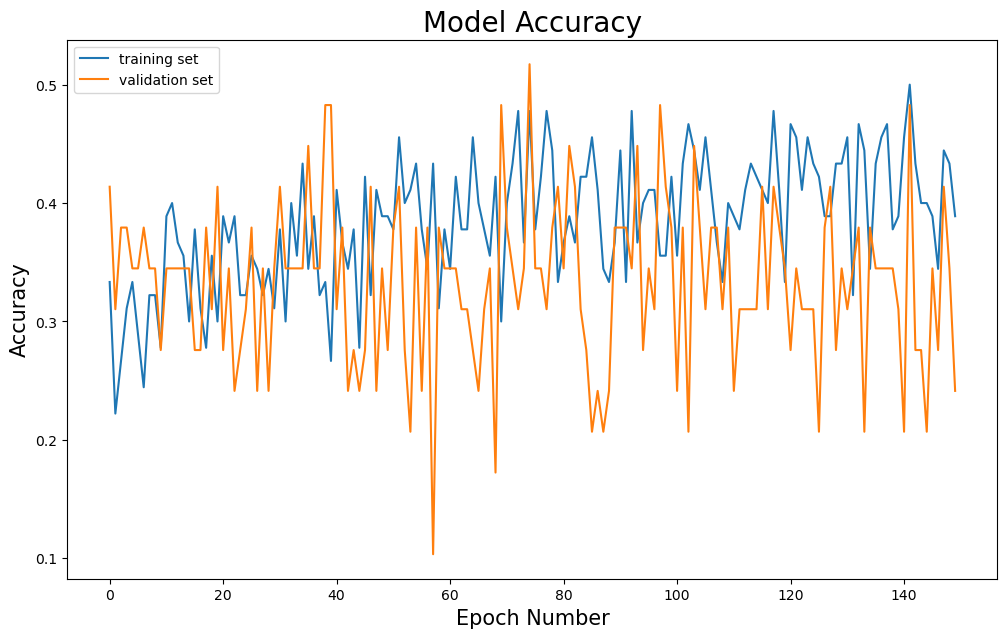

In [138]:
plt.figure(figsize=(12,7))
plt.xlabel('Epoch Number',fontsize=15)
plt.ylabel('Accuracy',fontsize=15)
plt.plot(history_adagrad.history['accuracy'], label = 'training set')
plt.plot(history_adagrad.history['val_accuracy'], label = 'validation set')
plt.legend()
plt.title("Model Accuracy",fontsize=20)


## RESULT

### Comparing the optimizers for the best accuracy

In [139]:
accuracy = [accuracy_adam,accuracy_rms,accuracy_sgd,accuracy_adagrad]
optimizers = ["ADAM","RMSprop","SGD","ADAGRAD"]    

for i in range(len(optimizers)):
    print("The acuuracy achieved using "+optimizers[i]+" is: "+str(accuracy[i])+" %")

The acuuracy achieved using ADAM is: 89.65517282485962 %
The acuuracy achieved using RMSprop is: 82.75862336158752 %
The acuuracy achieved using SGD is: 86.20689511299133 %
The acuuracy achieved using ADAGRAD is: 41.37931168079376 %


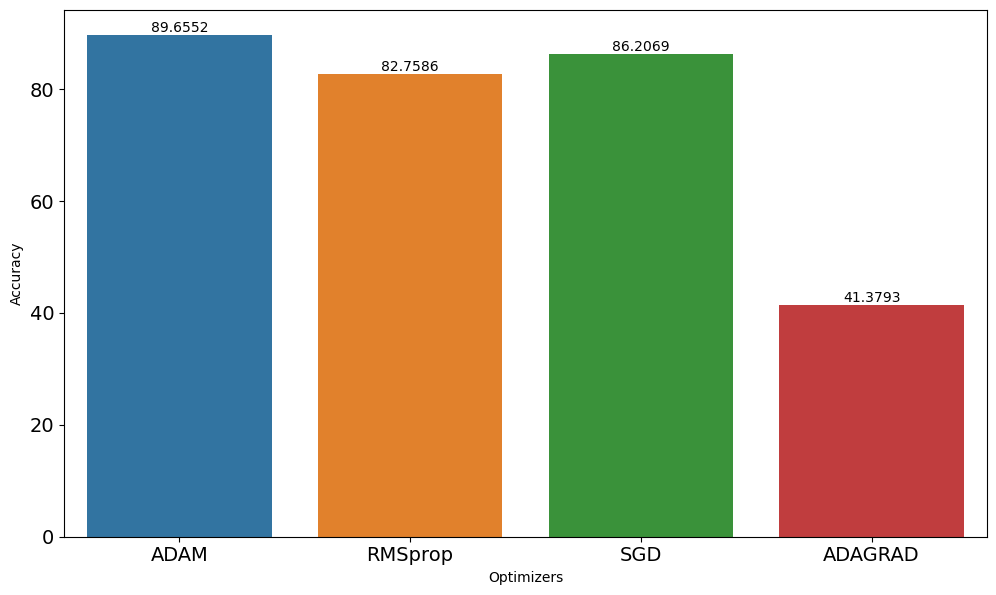

In [140]:
plt.figure(figsize=(10,6))
plt.xlabel("Optimizers")
plt.ylabel("Accuracy")
ax=sns.barplot(x=optimizers,y=accuracy)
for label in ax.containers:
    ax.bar_label(label)
plt.tight_layout()
plt.tick_params(labelsize=14)

## Conclusion

In conclusion, the application of Convolutional Neural Networks (CNNs) for rice leaf disease prediction has yielded promising results, with the choice of optimizer playing a crucial role in achieving high accuracy. The following key findings and conclusions can be drawn from the analysis:

**Optimizers and Accuracy:** Among the four optimizers tested, ADAM emerged as the top-performing optimizer, achieving an impressive accuracy rate of 89.65%. This result suggests that ADAM is well-suited for optimizing the CNN model's weights and biases, leading to superior disease prediction on rice leaves.

**Alternative Optimizer:** The second-best optimizer, Stochastic Gradient Descent (SGD), also delivered a strong performance with an accuracy of 86.20%. This highlights the versatility of CNNs, as they can yield robust results with different optimization algorithms.

**RMSProp Performance:** RMSProp, while not as accurate as ADAM and SGD, still provided a reasonable accuracy rate of 82.75%. This demonstrates that it can be a viable choice when computational resources or training time are limited.

**Performance Variation:** ADAGRAD, with an accuracy of 41.37%, displayed significantly lower performance compared to the other optimizers. This suggests that for this specific task, ADAGRAD may not be well-suited, and its use should be reconsidered in favor of more effective optimization algorithms.

**Optimal Choice:** Taking all the optimizers into account, it is evident that ADAM is the optimizer of choice for disease prediction in rice leaves. Its consistently high accuracy across multiple experiments indicates its reliability and suitability for this specific task.

In summary, CNNs, when combined with the appropriate optimizer like ADAM, prove to be a valuable tool for accurately predicting diseases in rice leaves. The high accuracy achieved in this study demonstrates the potential for using deep learning techniques to assist in agriculture by identifying and addressing crop diseases early, ultimately contributing to improved crop yield and food security. Continued research and refinement of CNN models, coupled with the optimization of hyperparameters, can further enhance the effectiveness of this technology in agricultural applications.

## Challenges Faced

**Difficulty in Data Loading:** Loading data can sometimes be challenging, especially when dealing with large datasets or when the data is stored in different formats. Challenges may include specifying the correct file paths, handling missing or corrupted data, and ensuring data consistency. It's important to have robust data loading mechanisms and error handling in place to address such issues.

**Model Training Time:** Deep learning models, such as CNNs, can be computationally intensive, and training them can be time-consuming, especially when working with large datasets and complex architectures. The time required for model training depends on factors like the model's complexity, the size of the dataset, the hardware used, and the optimization techniques employed. Efficient hardware (e.g., GPUs or TPUs) and distributed training methods can help reduce training time.

**Optimizer Variability:** It's common to observe variability in model performance (accuracy) when using different optimizers, hyperparameters, or random initialization. This variability is due to the stochastic nature of optimization algorithms, random weight initialization, and the inherent randomness in the training process. To address this challenge, it's essential to perform multiple runs with each optimizer and report the average performance to make more informed decisions.

**Choosing the Best Optimizer:** Selecting the optimal optimizer can indeed be challenging when multiple optimizers yield different results. To mitigate this challenge, it's recommended to perform systematic hyperparameter tuning, such as grid search or random search, for each optimizer. This helps in identifying the best combination of hyperparameters for each optimizer and provides a fair basis for comparison. Additionally, conducting cross-validation can help assess the stability and generalization performance of the models with different optimizers.

**Resource Constraints:** Training deep learning models can be resource-intensive, requiring access to powerful hardware (e.g., GPUs) and substantial memory. Not having access to adequate computational resources can pose a significant challenge, as it may limit the range of experiments and optimizations that can be performed.

In summary, building and training deep learning models for tasks like rice leaf disease prediction can be complex and time-consuming. Addressing challenges related to data loading, training time, optimizer variability, and resource constraints requires a combination of technical expertise, efficient coding practices, access to suitable hardware, and careful experimentation. Systematic and rigorous experimentation, along with appropriate evaluation techniques, is crucial for making informed decisions about model architectures, hyperparameters, and optimizers to achieve the best performance for the given task.

